In [ ]:
#GitHub: https://github.com/stephanaccantec/TDWI

#Bibliotheken:

#pip install numpy
#pip install pandas
#pip install spacy
#pip install scikit-learn

# Natural Language Processing 
![Was ist NLP](<https://s2.qwant.com/thumbr/0x380/c/e/10c54c87272bdae830c4378495ff38b0e0af52906cdb0b0f6836eb4ad110f0/NLP-word-cloud-e1432237783661.jpg?u=https%3A%2F%2Fwww.thoughtmodels.com%2Fwp-content%2Fuploads%2F2016%2F06%2FNLP-word-cloud-e1432237783661.jpg&q=0&b=1&p=0&a=1>)

# Agenda

<img src="./Grafiken/Agenda/Agenda.jpg" style="width:400px"/>

# Beispiele
### -Dokumenten-Korpus aus Zeitungsartikeln

In [102]:
#Funktion zum Einlesen von Texten
#speichern als Key-Value-Paar (Dictionary)

def read_documents(fqn :str):
    import glob, os
    
    #Korpus-Dictionary:
    documents = {}
    
    #jedes Dokument im Verzeichnis wird eingelesen
    for file in glob.glob(fqn):

        filename = open(file, "r", encoding='cp1252')
        text = str(filename.readlines())

        path = os.path.basename(file)
        extension = os.path.splitext(file)[1]
        filename, extension = path.split('.')
        
        #Text mit dem Namen des Dokuments als Schlüssel
        documents[filename] = text
            
    return(documents)

In [103]:
documentsList = []

#Aufruf der Funktion zum Einlesen der Dokumente
documents = read_documents("./Artikel/*.txt")
for key in documents:
    documentsList.append(key)
    
documentsList

['(Finanzen) Basel IV',
 '(Politik ) Weißes Haus rechnet mit Schließung der Grenze zu Mexiko',
 '(Finanzen) Die Mailänder Börse ist in Feierlaune',
 '(Apple) Bleibt doch noch ein bisschen',
 '(Motor) Mittelklasse, nur nicht beim Preis',
 '(Apple) Konkurrenz für Netflix',
 '(Apple) Ladematte AirPower',
 '(Finanzen) Schweizer Banken Die Zeiten, um an den Finanzmärkten mutig zu sein, sind erst einmal vorbei',
 '(Finanzen) Natixis im Gespräch',
 '(Motor) BMW setzt noch einen drauf',
 '(Sport) Joachim Löw und die Nationalelf',
 '(Finanzen) Bankenmarkt',
 '(Apple) Hollywood-Stars präsentieren',
 '(Sport) Klopp geht all in und gewinnt ',
 '(Sport) Zweite Bundesliga',
 '(Apple) Lebensrettende Massnahmen für Apple TV',
 '(Politik ) Was Kim kann, kann Trump auch',
 '(Sport) Jetzt wird Bayern nervös',
 '(Motor) Deutschland sucht das Super-SUV',
 '(Politik ) Der Brandbeschleuniger im Weißen Haus',
 '(Motor) Blitz und Schatten',
 '(Motor) Tesla im Fahrtest',
 '(Politik ) Trump, Trump und nochmals T

# Was ist Natural Language Processing?

### -eine mit der Computerlinguistik verwandte Disziplin

### -Verarbeitung natürlicher Sprache (gesprochen und als Text) durch Computer

### -Interaktion zwischen Mensch und Maschine auf der Basis menschlicher Sprache

### -Befähigt Software menschliche Sprache als Input zu erfassen und passende Ergebnisse als Output zur Verfügung zu stellen

# Warum Natural Language Processing?

### -alleine  durch  die  Nutzung  sozialer  Medien, bspw. durch Messenger-Nachrichten, Status-Updates, usw., entsteht pro Minute ein Datenvolumen von 2000 TB an Daten

### -Informationen und Inhalte werden direkt vom Kunden erstellt

### -Menschen unterschiedlicher Demographien, Regionen und Kulturen

### -nützlich bei der Erstellung von Kundenprofilen, sowie dem Erkennen von Trends und Entwicklungen

### -ermöglicht die Erstellung Sprach getriebener Software-Produkte

# Einsatz von Natural Language Processing

### Sprachassistenten

![Siri](<https://sophosnews.files.wordpress.com/2017/07/siri-1200.jpg?w=780&h=408&crop=1>)







## bessere Übersetzungen dank des mit Einbeziehens von Grammatik und Semantik

![Google Tranlate](<http://icons.iconarchive.com/icons/marcus-roberto/google-play/256/Google-Translate-icon.png>)







## die "beliebten" Chatbots

![Chatbot](<https://mobilemonkey.com/wp-content/uploads/2017/04/efYxWC6.jpg>)

# Ein Anwendungsbeispiel: Named Entity Recognition

## Was ist Named Entity Recognition, bzw. "Eigennamenerkennung"?
### -automatische Identifikation und Klassifikation von Eigennamen

### -ein Eigenname beschreibt eine real existierende Identität
### -> Personen
### -> Organisationen
### -> Orte
### -> etc.

# Beispielsatz: Stephan Becker fährt mit dem Zug zur TDWI nach München

In [104]:
import spacy
from spacy import displacy
import de_core_news_sm
nlp = de_core_news_sm.load()

#Definieren eines Texts
text = 'Stephan Becker fährt mit dem Zug zur TDWI nach München.'

#Übergabe des Texts an die spaCy-Pipeline
doc = nlp(text)

sentences = [x for x in doc.sents]

### automatisches Erkennen von Entitäten in Sätzen:

In [105]:
displacy.render(nlp(sentences[0].string), jupyter=True, style='ent')

### erkennen grammatikalischer Komponenten:

In [106]:
displacy.render(nlp((sentences[0].string)), style='dep', jupyter = True, options = {'distance': 120})

# Anwendungsmöglichkeiten?

-> z.B. zur Anonymisierung von Personen in Texten

<img src="./Grafiken/NaturalEntityRecognition.jpg" style="width:800px"/>

In [107]:
#Definieren eines Texts
text = 'Stephan Becker fährt mit dem Zug zur TDWI nach München.'

#Übergabe des Texts an die spaCy-Pipeline
doc = nlp(text)

#Liste aus welcher das zensierte Dokument neu aufgebaut wird
censored = []

#Iterieren über jedes Wort des zu zensierenden Texts
for word in doc:
    
    #falls ein Wort mit dem Tag 'PER' als Name markiert wurde, wird dieser durch die Zeichenkombination 'XXXXX' ersetzt
    if word.ent_type_ == 'PER' and len(word) > 1:
        cens = 'X'*5
        censored.append(cens)
        
    #andernfalls erfolgt eine unzensierte Übernahme
    else:
        censored.append(word.text)

In [108]:
str(censored)

"['XXXXX', 'XXXXX', 'fährt', 'mit', 'dem', 'Zug', 'zur', 'TDWI', 'nach', 'München', '.']"

<img src="./Grafiken/Agenda/Normalisierung.jpg" style="width:800px"/>

# Text-Normalisierung

### Den  ersten  Schritt  bei  der  Aufbereitung  von  Textdaten,  stellt  die  sogenannte  Normalisierung  dar.  Durch  Bereinigen  und  Standardisieren  werden  Textdaten  bei  der  Textnormalisierung in eine standardisierte Form überführt, welche für weitere Analysen genutzt werden kann. Textnormalisierung ist ein Prozess, welcher sich meist aus einzelnen Schritten zusammensetzt, welche im Folgenden erläutert werden.

In [109]:
Dokument_1 = 'Das Auto fährt schnell. Ein Auto ist kein Motorrad.'
Dokument_2 = 'Der Zug fährt schneller als das Auto'
Dokument_3 = 'Ein Flugzeug fliegt'

beispiel = {}
beispiel['Dokument_1'] = Dokument_1
beispiel['Dokument_2'] = Dokument_2
beispiel['Dokument_3'] = Dokument_3

# Tokenisierung

### -Worte sind die kleinste Informationstragende Einheit in Sprachen
### -Tokenisierung bedeutet die Zerlegung von Text in einzelne Worte, bzw. "Token"
### -Üblicherweise der erste Schritt um Zugang zu der im Text enthaltenen Information zu erlangen

### ABER:
### -Satzstrukturen gehen verloren
### -daher nicht für semantische Analysen wie Named Entity Recognition geeignet

### ein einfaches Beispiel:

'Das Auto fährt schnell. Ein Auto ist kein Motorrad.'

In [110]:
beispiel.get('Dokument_1').split(' ')

['Das', 'Auto', 'fährt', 'schnell.', 'Ein', 'Auto', 'ist', 'kein', 'Motorrad.']

### ein einfaches "Zerteilen" des Satzes ist nicht ausreichend: 
### -Satzzeichen werden nicht von Worten getrennt: 'Angebot.'
### -Zeilenumbrüche werden nicht ignoriert:  "\n',", "Euro.\\n'

## Beispiel eines simplen Tokenizers:

In [111]:
def tokenizer(documents):
    tokenized = {}
    
    #Iterieren über jedes Dokument
    for doc in documents:
        
        document = documents.get(doc)
        
        #Festlegen von Sonderzeichen, welche entfernt werden sollen
        punctuations = ['(',')',';',':','[',']','{','}',',','.','-','``',"''",'!','\"','§','$','%','&','?','@','+','–','~','*','#','\'','\\n','\\','„','“']
        
        #Liste der einzelnen, sauberen Token
        cleaned = []
        
        #Zerteilen des Dokuments in zunächst unsaubere Token
        token = document.split(' ')
        
        #Iterieren über Token-Liste
        for t in token:
            temp = t
            
            #Iterieren über Sonderzeichen-Liste
            for p in punctuations:
                
                #falls ein Sonderzeichen vorhanden ist, wird es entfernt
                if p in t:
                    temp = temp.replace(p, '')
                    
            #alle Worte, bzw. Token werden kleingeschrieben übernommen
            cleaned.append(temp.lower())
            
        tokenized[doc] = cleaned

    return(tokenized)

In [112]:
#Übergabe Zeitungsartikel
tokenized = tokenizer(documents)

#Übergabe Beispiel
beispiel_tokenized = tokenizer(beispiel)
beispiel_tokenized

{'Dokument_1': ['das',
  'auto',
  'fährt',
  'schnell',
  'ein',
  'auto',
  'ist',
  'kein',
  'motorrad'],
 'Dokument_2': ['der', 'zug', 'fährt', 'schneller', 'als', 'das', 'auto'],
 'Dokument_3': ['ein', 'flugzeug', 'fliegt']}

## Stopwords

### Stopwords sind Worte welche häufig vorkommen, meist jedoch wenig an benötigter Information enthalten
### -Bspw.: der, die, das, dem, dessen, etc.
### -Aussortieren, um größe des Datensatzes zu reduzieren und eine mögliche Überlagerung der eigentlich interessanten Information zu verhindern
### -es sind auch sogenannte Startwords möglich, mit deren Hilfe schnell und einfach untersucht werden kann, ob ein Text thematisch überhaupt interessant ist

## Beispiel Stopwords:

In [113]:
def stopwords(tokenized):
    
    #Definieren einer Liste, welche alle unerwünschten Worte enthält
    stopwords = ["ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]
    
    removed = {}
    
    #Iterieren über alle Dokumente
    for doc in tokenized:
        document = tokenized.get(doc)
        
        #Iterieren über Stopwords-Liste
        no_stopwords = [token for token in document if not token in stopwords]
        removed[doc] = no_stopwords
    
    return(removed)

In [114]:
#Übergabe tokenisierte Zeitungsartikel
stopwordsRemoved = stopwords(tokenized)

#Übergabe tokenisierte Beispiele
beispiel_stopwords = stopwords(beispiel_tokenized)
beispiel_stopwords

{'Dokument_1': ['auto', 'fährt', 'schnell', 'auto', 'motorrad'],
 'Dokument_2': ['zug', 'fährt', 'schneller', 'auto'],
 'Dokument_3': ['flugzeug', 'fliegt']}

<img src="./Grafiken/Agenda/Sentiment.jpg" style="width:800px"/>

# Sentiment Analysis

### Sentiment = Gefühl, Empfindung
### Möglichkeit um die "Stimmung" oder "Gefühlslage" in einem Text zu analysieren

### Anwendung bspw. als Ergänzung zur Analyse der Stimmung von Investoren oder im Marketing

## Funktionsweise:

### -Worte werden als positive oder negative Signale festgelegt
### -Bspw. "stark", "gut", "schnell" als positive, oder "schwach", "schlecht", "langsam" als negative
### -Überprüfung des Verhältnisses, in welchem positive und negative Worte in einem Text vorkommen

![Sentiment-Analyse](<./Grafiken/Sentiment_Analysis.jpg>)

## Anwendungsbeispiel:

In [115]:
def sentimentAnalysis(documents):
    import json
    
    #Liste mit positiven Worten
    with open('./SentimentAnalysis/positive.json') as positive:  
        positiveWords = json.load(positive)
        
    #Liste mit negativen Worten
    with open('./SentimentAnalysis/negative.json') as negative:  
        negativeWords = json.load(negative)
    
    #Iterieren über alle Dokumente
    for doc in documents:
        
        #Counter für positive sowie negative Worte pro Dokument
        positive = 0
        negative = 0
        text = documents.get(doc)
        
        #Gesamtlänge des Dokuments
        summe = len(text)
        
        #Überprüfen jedes einzelnen Token im Dokument, ob er positiv oder negativ ist
        for token in text:
            if token in positiveWords:
                positive += 1
            elif token in negativeWords:
                negative += 1
                
        #Überprüfen, ob mehr positive oder negative Worte vorkamen
        if positive > negative:
            print("Der Artikel '" + doc + "' ist überwiegend positiv (" + str(round((positive/summe)*100, 2)) + "%)")
        elif negative > positive:
            print("Der Artikel '" + doc + "' ist überwiegend negativ (" + str(round((negative/summe)*100, 2)) + "%)")
        elif positive == negative:
            print("Der Artikel '" + doc + "' ist neutral")
        print('_'*150)
        print(' ')

In [116]:
sentimentAnalysis(stopwordsRemoved)

Der Artikel '(Finanzen) Basel IV' ist überwiegend positiv (3.01%)
______________________________________________________________________________________________________________________________________________________
 
Der Artikel '(Politik ) Weißes Haus rechnet mit Schließung der Grenze zu Mexiko' ist überwiegend positiv (3.7%)
______________________________________________________________________________________________________________________________________________________
 
Der Artikel '(Finanzen) Die Mailänder Börse ist in Feierlaune' ist überwiegend positiv (2.21%)
______________________________________________________________________________________________________________________________________________________
 
Der Artikel '(Apple) Bleibt doch noch ein bisschen' ist überwiegend positiv (5.71%)
______________________________________________________________________________________________________________________________________________________
 
Der Artikel '(Motor) Mittelklas

## Ergebnisse im Detail:

## Der Artikel 'BMW setzt noch einen drauf' ist überwiegend positiv (4.63%)

## positiv: 
['mächtige', 'wagte', 'stattliche', 'großem', 'wert', 'erneuerten', 'verantwortlichen', 'starkes', 'maximale', 'verstärkungen', 'spezielle', 

## negativ: 
['beeindruckte', 'ruhe', 'schlechter']



## Der Artikel 'Der Vorwurf eines unerwünschten Kusses' ist neutral

## positiv:
['mögliche', 'mögliche', 'erklärte', 'sicher']

## negativ:
['vorwürfe', 'vorwürfe', 'vorwürfen', 'unangemessenes']



## Der Artikel 'Trump, Trump und nochmals Trump' ist überwiegend negativ (4,78%)

## positiv:
['gewinnen', 'möglichst', 'kommunikativen', 'gepflegtere', 'wiederherstellung', 'guten', 'gelassene', 'möglichst']

## negativ:
['schelten', 'unzufriedenen', 'tote', 'bizarre', 'sorgen', 'attacken', 'kriminelle', 'schwerer', 'drastische', 'bitterer', 'blutigen']

<img src="./Grafiken/Agenda/Vektorisierung.jpg" style="width:800px"/>

# Vektorisierung

## Herausforderungen

## Typischerweise werden durch Algorithmen strukturierte, numerische Daten analysiert

<img src="./Grafiken/Netzwerk_Daten.jpg" style="width:800px"/>

## Was sind strukturierte Daten?

In [117]:
Attribut_1 = ['X','X','X']
Attribut_2 = ['X','X','X']
Attribut_3 = ['X','X','X']

array = {}
array['Attribut_1'] = Attribut_1
array['Attribut_2'] = Attribut_2
array['Attribut_3'] = Attribut_3

import pandas as pd
Dataframe = pd.DataFrame.from_dict(array)
Dataframe

,Attribut_1,Attribut_2,Attribut_3
0,X,X,X
1,X,X,X
2,X,X,X


In [118]:
Länge = [3,5,8]
Breite = [9,7,3]
Höhe = [4,2,7]

maßearray = {}
maßearray['Länge'] = Länge
maßearray['Breite'] = Breite
maßearray['Höhe'] = Höhe

import pandas as pd
MaßeDataframe = pd.DataFrame.from_dict(maßearray)
MaßeDataframe

,Länge,Breite,Höhe
0,3,9,4
1,5,7,2
2,8,3,7


In [119]:
Haus = ['groß', 'breit', 'neu']
Auto = ['schnell', 'BMW', 'Porsche']
Flugzeug = ['Triebwerk', 'Airbus', 'fliegt']

wortearray = {}
wortearray['Haus'] = Haus
wortearray['Auto'] = Auto
wortearray['Flugzeug'] = Flugzeug
WorteDataframe = pd.DataFrame.from_dict(wortearray)
WorteDataframe

,Haus,Auto,Flugzeug
0,groß,schnell,Triebwerk
1,breit,BMW,Airbus
2,neu,Porsche,fliegt


## Bildung des Vokabulars
### -enthält jedes im Dokument, bzw. Dokumenten-Korpus, vorkommende Wort (Token) genau einmal
### -ein Token ist ein Attribut

In [120]:
beispiel_stopwords

{'Dokument_1': ['auto', 'fährt', 'schnell', 'auto', 'motorrad'],
 'Dokument_2': ['zug', 'fährt', 'schneller', 'auto'],
 'Dokument_3': ['flugzeug', 'fliegt']}

### für das Vokabular folgt:
## Vokabular = ['auto', fliegt', 'flugzeug', 'fährt', 'motorrad', 'schnell', 'schneller', 'zug']

In [121]:
def get_vocabulary(documents):
    
    vocabulary = set()
    #Iterieren über alle Dokumente
    
    for key in documents:
        
        #Übernahme des gesamten Texts
        text = documents.get(key)
        
        #Hinzufügen jener Worte zum Vokabular, welche noch nicht enthalten sinf
        vocabulary = vocabulary.union(text)
    
    return(vocabulary)

In [122]:
beispiel_vocabulary = get_vocabulary(beispiel_stopwords)
str(beispiel_vocabulary)

"{'flugzeug', 'schneller', 'fliegt', 'fährt', 'zug', 'motorrad', 'auto', 'schnell'}"

### Überführung in einen Vektorraum
## $VR=\{W_1,W_2,\dots,W_N\}$
## Anzahl der Worte bestimmt die Dimensionalität des Vektors

In [123]:
data = [('W_11', 'W_12', 'W_13', 'W_14', 'W_15', 'W_16', 'W_17', 'W_18'), ('W_21', 'W_22', 'W_23', 'W_24', 'W_25', 'W_26', 'W_27', 'W_28'), ('W_31', 'W_32', 'W_33', 'W_34', 'W_35', 'W_36', 'W_37', 'W_38')]
df = pd.DataFrame(data, columns=beispiel_vocabulary, index=['Dokument_1', 'Dokument_2', 'Dokument_3'])
df

,flugzeug,schneller,fliegt,fährt,zug,motorrad,auto,schnell
Dokument_1,W_11,W_12,W_13,W_14,W_15,W_16,W_17,W_18
Dokument_2,W_21,W_22,W_23,W_24,W_25,W_26,W_27,W_28
Dokument_3,W_31,W_32,W_33,W_34,W_35,W_36,W_37,W_38


## Bag-of-Words

### -einfacher Ansatz in welchem ein Dokument als ein "Bag" aus Worten (unabhängig von Folgen und Grammatik) repräsentiert wird
### -die Gewichtung eines Wortes basiert auf der absoluten Häufigkeit, mit welcher es im Dokument vorkommt

In [124]:
def bag_of_words(documents, vocabulary):
    import pandas as pd
    bow = {}
    
    #Iterieren über alles Dokuemente
    for key in documents:
        document = documents.get(key)
        
        #Erstellen eines temporären Dictionaries, jedes Attribut ist zu Beginn = 0
        dictTemp = dict.fromkeys(vocabulary, 0)
        
        #Iterieren über alle Token
        for token in document:
            
            #der Zähler (Value) wird bei Vorhandensein eines entsprechenden Tokens um +1 heraufgesetzt
            dictTemp[token]+=1
            
        #die Ergebnisse werden für jedes Dokument in einem Dictionary gespeichert
        bow[key] = dictTemp
        
    #Erstellen eines Dataframes zur besseren Veranschaulichung
    bowDF = pd.DataFrame(bow).T
        
    return(bow, bowDF)

In [125]:
beispiel_bow, beispiel_bowDF = bag_of_words(beispiel_stopwords, beispiel_vocabulary)
beispiel_bowDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,2,0,0,1,1,1,0,0
Dokument_2,1,0,0,1,0,0,1,1
Dokument_3,0,1,1,0,0,0,0,0


## Term Frequency - Inverse Document Frequency (TF-IDF)

### -Beurteilung der Relevanz von Worten innerhalb eines Dokumenten-Korpus
### -Relevanz eines Wortes innerhalb eines Dokuments

### Term Frequency

### -entspricht wie Bag-of-Words der absoluten Häufigkeit, mit welcher ein Termn in einem einzigen Dokuemnt vorkommt

### auch relative Vorkommensheit möglich, um den Einfluss der Gesamtlänge des Dokuments zu reduzieren:

### $tf(t,D) = \frac{f_{t_D}}{max_{t'\in D} f_{t_D}}$

In [126]:
def term_frequency(bow, documents):
    import pandas as pd
    tfDict= {}
    
    #Iterieren über alle Dokumente
    for key in documents:
        tfCount = {}
        doc = documents.get(key)
        
        #Gesamtlänge des betrachteten Dokuments:
        wordCount = len(doc)
        
        #Iterieren über die bereits vorhandenen Bag-of-Words Gewichtungen
        for word, count in bow.get(key).items():
            
            #Bag-of-Words Count (Gewichtung) wird in Verhältnis zur Gesamtlänge des zugehörigen Dokuments gesetzt
            tfCount[word] = count / float(wordCount)
            
        #die Ergebnisse werden für jedes Dokument in einem Dictionary gespeichert    
        tfDict[key] = tfCount
        
    #Erstellen eines Dataframes zur besseren Veranschaulichung    
    tfDF = pd.DataFrame(tfDict).T
        
    return(tfDict, tfDF)

In [127]:
beispiel_tf, beispiel_tfDF = term_frequency(beispiel_bow, beispiel_stopwords)
beispiel_tfDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,0.40,0.0,0.0,0.20,0.2,0.2,0.00,0.00
Dokument_2,0.25,0.0,0.0,0.25,0.0,0.0,0.25,0.25
Dokument_3,0.00,0.5,0.5,0.00,0.0,0.0,0.00,0.00


### Inverse Document Frequency

### -inverse Dokumentenhäufigkeit
### -Aussage über die Spezifität eines Wortes innerhalb eines Dokumenten-Korpus

### $idf(t) = \log \frac{N}{\sum{df(t)}}$

### $N=$ Anzahl der Dokumente innerhalb des Korpus
### $df(t)=$ Anzahl der Dokumente, welche einen spezifischen Term enthalten

In [128]:
def inverse_document_frequency(bow):
    import math
    idfDict = {}
    
    #Ermitteln der Anzahl an Dokumenten im Korpus
    N = len(bow)
    
    #Übergabe des Vokabulars und setzen aller Werte = 0
    idfDict = dict.fromkeys(bow[next(iter(bow))].keys(),0)
    
    #i = 0
    for key in bow:
        doc = bow.get(key)
        
        #Iterieren über Bag-of-Words Gewichtungen
        for word, val in doc.items():
            
            #ist die Gewichtung größer Null, so ist ein Wort im entsprechenden Dokument vorhanden
            if val > 0:
                idfDict[word] +=1
        #i = i + 1
    for word, val in idfDict.items():
        
        #Erstellen der IDF (Logarithmus aus dem Verhältnis Gesamtanzahl Dokumente / Dokumente welche das Wort beinhalten)
        idfDict[word]= math.log(N / float(val))
    
    return(idfDict)

In [129]:
beispiel_idf = inverse_document_frequency(beispiel_bow)
beispiel_idf

{'flugzeug': 1.0986122886681098,
 'schneller': 1.0986122886681098,
 'fliegt': 1.0986122886681098,
 'fährt': 0.4054651081081644,
 'zug': 1.0986122886681098,
 'motorrad': 1.0986122886681098,
 'auto': 0.4054651081081644,
 'schnell': 1.0986122886681098}

## TF-IDF

$tfidf=tf\times idf$

In [130]:
def term_frequency_inverse_document_frequency(tfBow, idfs):
    import pandas as pd
    tfidf = {}
    tfidfDict = {}
    
    #Iterieren über alle relativen Gewichtungen
    for key in tfBow:
        text = tfBow.get(key)
        tfidf = {}
        for word, val in text.items():
            
            #Bilden des Produkts aus Term Frequency und Inverse Document Frequency
            tfidf[word] = val * idfs[word]
        tfidfDict[key] = tfidf
        
    #Erstellen eines Dataframes zur besseren Veranschaulichung
    tfidfDF = pd.DataFrame(tfidfDict).T
    
    return(tfidfDict, tfidfDF)

In [131]:
beispiel_tfidf, beispiel_tfidfDF = term_frequency_inverse_document_frequency(beispiel_bow, beispiel_idf)
beispiel_tfidfDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,0.810930,0.000000,0.000000,0.405465,1.098612,1.098612,0.000000,0.000000
Dokument_2,0.405465,0.000000,0.000000,0.405465,0.000000,0.000000,1.098612,1.098612
Dokument_3,0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000


In [132]:
#Durchführen aller vorgestellten Schritte für die Zeitungsartikel
vocabulary = get_vocabulary(stopwordsRemoved)
bow, bowDF = bag_of_words(stopwordsRemoved, vocabulary)
tf, tfDF = term_frequency(bow, stopwordsRemoved)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [133]:
tfidfDF

,,00,000,02,03,10,100,10000,105,109900,...,übertragenden,übertrieben,überzeugen,überzeugt,üble,üblicherweise,übrig,üppig,üppiger,€
(Finanzen) Basel IV,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Politik ) Weißes Haus rechnet mit Schließung der Grenze zu Mexiko,0.0,0.000000,1.832581,0.000000,0.000000,0.000000,2.120264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Finanzen) Die Mailänder Börse ist in Feierlaune,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.875503
(Apple) Bleibt doch noch ein bisschen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.120264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(Motor) Mittelklasse, nur nicht beim Preis",0.0,0.000000,3.665163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Apple) Konkurrenz für Netflix,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000
(Apple) Ladematte AirPower,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(Finanzen) Schweizer Banken Die Zeiten, um an den Finanzmärkten mutig zu sein, sind erst einmal vorbei",0.0,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.218876,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Finanzen) Natixis im Gespräch,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Motor) BMW setzt noch einen drauf,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218876,3.218876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Es lässt sich feststellen, welche Worte innerhalb eines Dokuments am wichtigsten sind:

In [135]:
#Isolieren eines Dokumenten-Vektors
vektor = tfidfDF.loc[['(Motor) BMW setzt noch einen drauf']]

#Transponieren des Dokumenten-Vektors
vektorTransponiert = vektor.transpose()

#Werte auf Basis ihrere Gewichtungen sortieren
vektorSorted = vektorTransponiert.sort_values(by=['(Motor) BMW setzt noch einen drauf'], ascending=False)

#Anzeigen des am höchsten gewichteten Token
vektorSorted[:15]

,(Motor) BMW setzt noch einen drauf
x5,25.257286
x7,15.154372
bmw,12.721581
liter,10.995489
ps,9.162907
kostet,7.577186
variante,6.437752
einstieg,6.437752
mittlere,6.437752
motoren,6.437752


<img src="./Grafiken/Agenda/Keyword.jpg" style="width:800px"/>

# Anwendungsbeispiel: Keywordsuche

# Erstellen einer Keywordsuche


<img src="./Grafiken/KeywordSearch.jpg" style="width:800px"/>

In [136]:
#1
#Funktion zum Durchsuchen der Dokumente des Korpus nach dem gewünschen Wort

def search_keyword(keyword, tfidfDataFrame):
    
    #Liste der Suchergebnisse
    searchList = []
    
    #Iterieren über Dataframe mit TF-IDF Gewichtungen
    for doc in tfidfDataFrame:
        
        #isolierte Betrachtung des Dokumenten Vektors
        vec = tfidfDataFrame[doc]
        
        #falls das gesuchte Wort im Vektor vorhanden ist:
        if vec.get(keyword) != 0:
            
            #Übernahme der zugehörigen Gewichtung im Dokument
            tfidf_value = vec.get(keyword)
            searchList.append([tfidf_value, doc])
            
    return sorted(searchList, reverse=True)

In [137]:
#2
#Suche nach verwandten Dokumenten

def related_docs(docs, n, tfidfDataFrame):
    
    relatedDocs = []
    n += 2
    
    #Iterieren über alle Dokumente in welchen das Suchwort gefunden wurde
    for doc in docs:
        
        #Name des aktuell betrachteten Dokuments:
        docName = doc[1]
        
        #Ermitteln der wichtigsten Worte im betrachteten Dokument:
        relDocs = get_top_words(docName, n, tfidfDataFrame)
        
        #Ermitteln von Dokumenten, in welchen diese Worte ebenfalls eine hohe Bedeutung haben
        topWordDocs = get_top_words_documents(docName, relDocs, tfidfDataFrame)
        relatedDocs.append([doc[1], relDocs, topWordDocs])
        
    return(relatedDocs)

In [138]:
#3
#Ermitteln der wichtigsten Worte eines Dokuments

def get_top_words(document, n, tfidfDataFrame):
    
    topDict = {}
    topList = []
    
    #Dokumenten-Vektor
    vec = tfidfDataFrame[document]
    
    #Sortieren der Worte nach Gewichtungen:
    sorted_vec = vec.sort_values(ascending=False)
    top = sorted_vec[0:n]
    
    
    for i, row in top.iteritems():
        
        #falls das gefundene Wort nicht dem eigentlichen Suchwort entspricht:
        if i != keyword:
            topList.append(i)
            
    #Übergabe der gewünschten Anzahl an Top-Words
    topDict[document] = topList[0:n-2]
    
    #zurück zu 2
    return(topDict)

In [139]:
#4
#Ermitteln verwandter Dokumente
def get_top_words_documents(docName, relDocs, tfidfDataFrame):
    
    wordList = []
    topWordDocList = []
    wordList = relDocs.get(docName)
    
    #Iterieren über die Liste der wichtigsten Worte
    for word in wordList:
        
        #Durchsuchen des Korpus nach Dokumenten, in welchen das gesuchte Wort ebenfalls relevant ist (5)
        topWordDocList.append(search_top_word_documents(word, tfidfDataFrame))
        
    return(topWordDocList)

In [140]:
#5
#Suche nach Dokumenten, welche das gesuchte Wort beinhalten

def search_top_word_documents(keyword, tfidfDataFrame):
    
    topDocsList = []
    docList = []
    topWordDocuments = {}
    
    #erneutes Iteriere über alle Dokumente des Korpus:
    for doc in tfidfDataFrame:
        
        #Dokumentenvektor
        vec = tfidfDataFrame[doc]
        
        #Überprüfen, ob Wort vorhanden ist
        if vec.get(keyword) != 0:
            topDocsList.append(doc)
        topWordDocuments[keyword] = topDocsList
        
    return(topWordDocuments)

In [143]:
def keyword_search(keyword, tfidfDataFrame):
    search = search_keyword(keyword, tfidfDataFrame)
    complete = related_docs(search, 5, tfidfDataFrame)
    return(complete)

tfidfDataFrame = tfidfDF.transpose()

keyword = input('Bitte ein Suchwort eingeben (in Kleinbuchstaben): ')
result = keyword_search(keyword, tfidfDataFrame)

i = 1

print('SUCHBEGRIFF: ' + keyword)
print('Gefunden in folgenden Dokumenten:')
print('_'*100)
print('')
for res in result:
    print('RANG: ' + str(i))
    print('DOKUMENT: ' + res[0])
    print('Weitere, wichtige Begriffe in "' + res[0] + '":')
    topWords = res[1].get(res[0])
    topDocuments = res[2]
    for topW in topWords:
        for topD in topDocuments:
            if topD.get(topW) != None:
                x = topD.get(topW)
                print('"' + str(topW) + '"' + ', bedeutsam in: "' + x[0] + '"')
    i+=1
    print('_'*100)
    print('')

Bitte ein Suchwort eingeben (in Kleinbuchstaben):  apple


SUCHBEGRIFF: apple
Gefunden in folgenden Dokumenten:
____________________________________________________________________________________________________

RANG: 1
DOKUMENT: (Apple) Hollywood-Stars präsentieren
Weitere, wichtige Begriffe in "(Apple) Hollywood-Stars präsentieren":
"kreditkarte", bedeutsam in: "(Apple) Konkurrenz für Netflix"
"nachrichtenportal", bedeutsam in: "(Apple) Hollywood-Stars präsentieren"
"tv", bedeutsam in: "(Apple) Hollywood-Stars präsentieren"
"verfügbar", bedeutsam in: "(Apple) Hollywood-Stars präsentieren"
"dienst", bedeutsam in: "(Apple) Konkurrenz für Netflix"
____________________________________________________________________________________________________

RANG: 2
DOKUMENT: (Apple) Konkurrenz für Netflix
Weitere, wichtige Begriffe in "(Apple) Konkurrenz für Netflix":
"konzern", bedeutsam in: "(Apple) Bleibt doch noch ein bisschen"
"shows", bedeutsam in: "(Apple) Konkurrenz für Netflix"
"netflix", bedeutsam in: "(Apple) Bleibt doch noch ein bisschen"
"

<img src="./Grafiken/Agenda/Clustering.jpg" style="width:800px"/>

# Exkurs: Clustering

### -Clustering dient der Unterteilung von Daten in Gruppen ähnlicher Art
### -die Daten innerhalb eines Clusters sollen möglichst ähnlich zueinander sein
### -Cluster sollen zueinander möglichst unähnlich sein

## Ungeordnete Daten:
<img src="./Grafiken/Data_Unsorted.jpg" style="width:800px"/>

## In Gruppen, bzw. Cluster, unterteilte Daten:
<img src="./Grafiken/Data_Clusterd.jpg" style="width:800px"/>

# Der k-Means Algorithmus
### -einer der populärsten Clustering-Algorithmen
### -die Anzahl der Cluster (k) wird initial festgelegt

## es werden k Zentroide als vorläufige Cluster-Mittelpunkte festeglegt:
<img src="./Grafiken/Start_Centroids.jpg" style="width:800px"/>

## anschließend erfolgt für jeden Datenpunkt die Berechnung der Distanzen zu den vorhandenen Zentroiden:
<img src="./Grafiken/Centroid_Distances.jpg" style="width:400px"/>

## ein Datenpunkt wird jenem Zentroid zugeordnet, zu welchem er die geringste Distanz besitzt:
<img src="./Grafiken/Centroid_Assignment.jpg" style="width:200px"/>

## wurden alle Datenpunkte einem Zentroid zugeordnet, so werden diese auf Basis des Mittelwertes der Datenpunkte des eigenen Clusters neu verteilt:
<img src="./Grafiken/Moved_Centroids.jpg" style="width:800px"/>

## das Verfahren wird so oft wiederholt, bis keine Verschiebung der Zentroide mehr stattfindet
<img src="./Grafiken/Final_Centroids.jpg" style="width:800px"/>

<img src="./Grafiken/Agenda/Document-Clustering.jpg" style="width:800px"/>

# Anwendungsbeispiel: Clustering

<img src="./Grafiken/Clustering.jpg" style="width:500px"/>

In [144]:
import pandas as pd

dataframe = pd.DataFrame.from_dict(documents, orient = 'index')
dataframe.reset_index(level=0, inplace=True)
dataframe.columns = ['file', 'token']
dataframe = dataframe.sort_values(by=['file'])
dataframe = dataframe.reset_index(drop=True)

In [145]:
vocabulary = get_vocabulary(stopwordsRemoved)
bow, bowDF = bag_of_words(stopwordsRemoved, vocabulary)
tf, tfDF = term_frequency(bow, stopwordsRemoved)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [146]:
tfidfDF = tfidfDF.sort_index()
tfidfDF

,,00,000,02,03,10,100,10000,105,109900,...,übertragenden,übertrieben,überzeugen,überzeugt,üble,üblicherweise,übrig,üppig,üppiger,€
(Apple) Bleibt doch noch ein bisschen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.120264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Apple) Hollywood-Stars präsentieren,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.120264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000
(Apple) Konkurrenz für Netflix,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000
(Apple) Ladematte AirPower,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Apple) Lebensrettende Massnahmen für Apple TV,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Finanzen) Bankenmarkt,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218876,0.000000,0.000000,0.000000
(Finanzen) Basel IV,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(Finanzen) Die Mailänder Börse ist in Feierlaune,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.875503
(Finanzen) Natixis im Gespräch,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(Finanzen) Schweizer Banken Die Zeiten, um an den Finanzmärkten mutig zu sein, sind erst einmal vorbei",0.0,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.218876,0.000000,2.525729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
#kMeans-Clustering

def kMeans_clustering(feature_matrix):
    
    #Import des kMeans-Objekts
    from sklearn.cluster import KMeans
    
    #Festlegen der Parameter (k=5)
    km = KMeans(n_clusters=10, max_iter=10000)
    
    #Übergabe des Korpus mit den TF-IDF-Gewichtungen
    km.fit(feature_matrix.todense())
    
    #Übernahme der Cluster
    clusters = km.labels_
    
    return km, clusters

In [160]:
def clustering(tfidf_features, feature_names, dataframe):

    from collections import Counter
    import pandas as pd
    import numpy as np
    
    #Aufruf der kMeans-Clustering Funktion
    km_obj, clusters = kMeans_clustering(feature_matrix=tfidf_features)
    
    #Datframe welcher alle Clusterzugehörigkeiten enthält
    cluster = pd.DataFrame(clusters)
    
    #Zuordnen der Cluster-Nummern zu einzelnen Dokumenten
    dataframe['Cluster'] = cluster
    
    #Anzahl der Cluster
    c = Counter(clusters)
    total_clusters=len(c)

    cluster_details = {}  
    
    ordered_centroids = km_obj.cluster_centers_.argsort()[:, ::-1]

    #Anzahl der Features, welche das jeweilige Cluster am besten beschreiben
    topn_features=10

    #Erstellen eines Dictionaries mit den Ergebnissen
    for cluster_num in range(total_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index]
                        for index
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        files = dataframe[dataframe['Cluster'] == cluster_num]['file'].values.tolist()
        cluster_details[cluster_num]['file'] = files

    #Ausgabe der Ergebnisse
    for cluster in cluster_details:
        print('Cluster: ' + str(cluster))
        print(' ')
        print('enthaltene Dokumente:')
        print(cluster_details.get(cluster).get('file'))
        print(' ')
        print('Keyfeatures: ')
        print(cluster_details.get(cluster).get('key_features'))
        print(' ')
        print('_'*150)
        print('_'*150)
        print(' ')

In [161]:
import scipy
from scipy.sparse import csr_matrix

#Scikit-learn erwrtet Sparse-Matrix, daher Umwandlung des Dataframes
clustertfidfDF = scipy.sparse.csr_matrix(tfidfDF)

In [162]:
#Aufruf der Cluster-Funtkion
clustering(clustertfidfDF, sorted(vocabulary), dataframe)

Cluster: 0
 
enthaltene Dokumente:
['(Sport) Joachim Löw und die Nationalelf']
 
Keyfeatures: 
['löw', 'müller', 'joachim', 'hummels', 'boateng', 'bundestrainer', 'nominierte', 'saß', 'sonnenbrille', 'fc']
 
______________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________
 
Cluster: 1
 
enthaltene Dokumente:
['(Motor) Tesla im Fahrtest']
 
Keyfeatures: 
['model', '3', 'tesla', 'reichweite', 'autopilot', 'aktuell', 'kilometer', 'wagen', 'autopiloten', 'smartphone']
 
______________________________________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________________________

# Nutzung des TfidfVectorizers von Scikit-learn

In [163]:
#Anpassen der Stopwords Ergebnisse, da Vectorizer selber Tokenisierung vornimmt und einen String erwartet

def stopwords_string(tokenized):
    stopwords = ["ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]
    
    removed = {}
    
    for doc in tokenized:
        document = tokenized.get(doc)
        no_stopwords = [token for token in document if not token in stopwords]
        removed[doc] = str(no_stopwords)
    
    return(removed)

In [164]:
#TF-IDF Vectorisierung mit Scikit-Learn

def tfidf(corpus, ngram_range=(1,1)):
    
    #Import Vectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    #Festlegen von Parametern (u.A. Normierung L2)
    vectorizer = TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    
    return vectorizer, features

In [165]:
import numpy as np
import pandas as pd

stopwordsString = stopwords_string(tokenized)

featureDF = pd.DataFrame.from_records(stopwordsString, index=['token']).T


#Aufruf der Vectorizer-Funktion
tfidf_vectorizer, tfidf_features = tfidf(featureDF['token'])

#Feature Names entsprechen dem Vokabular
feature_names = tfidf_vectorizer.get_feature_names()

#Ertsellen eines Dataframes mit den TF-IDF Gewichtungen
scikit_learn_df = pd.DataFrame(np.round(tfidf_features.todense(), 4), columns=feature_names)

#Aufruf der Clustering-Funktion
clustering(tfidf_features, feature_names, dataframe)

Cluster: 0
 
enthaltene Dokumente:
['(Politik ) Der Brandbeschleuniger im Weißen Haus', '(Politik ) Der Vorwurf eines unerwünschten Kusses', '(Politik ) Trump, Trump und nochmals Trump', '(Politik ) Was Kim kann, kann Trump auch', '(Politik ) Weißes Haus rechnet mit Schließung der Grenze zu Mexiko']
 
Keyfeatures: 
['trump', 'biden', 'präsidenten', 'flores', 'donald', 'haus', 'grenze', 'horst', 'decker', 'adorf']
 
______________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________
 
Cluster: 1
 
enthaltene Dokumente:
['(Apple) Bleibt doch noch ein bisschen', '(Apple) Hollywood-Stars präsentieren', '(Apple) Konkurrenz für Netflix', '(Apple) Ladematte AirPower', '(Apple) Lebensrettende Massnahmen für Apple TV']
 
Keyfeatures: 
['apple', 'konzern', 'airpower

# Warum unterscheiden sich die Ergebnisse so stark?

## Vergleich der Ergebnisse der Vektorisierung:
### Scikit-learn:

In [158]:
vektor = scikit_learn_df.loc[[10]]
vektorTransponiert = vektor.transpose()
vektorSorted = vektorTransponiert.sort_values(by=[10], ascending=False)
vektorSorted[:5]

,10
x5,0.4450
x7,0.2670
bmw,0.2427
liter,0.2238
ps,0.1865


### eigener Vectorizer:

In [155]:
vektor = tfidfDF.loc[['(Motor) BMW setzt noch einen drauf']]
vektorTransponiert = vektor.transpose()
vektorSorted = vektorTransponiert.sort_values(by=['(Motor) BMW setzt noch einen drauf'], ascending=False)
vektorSorted[:5]

,(Motor) BMW setzt noch einen drauf
x5,25.257286
x7,15.154372
bmw,12.721581
liter,10.995489
ps,9.162907


### -> Scikit-learn nutzt die L-2 Normalisierung (auch als Hilbertraum L2 bekannt). Daher bewegen dich die Werte zwischen 0 und 1.
### die Summe aller quadrierten Werte eines Dokumenten-Vektors ist hierbei genau 1.
### durch diese Art der Skalierung wird der Einfluss der Länge eines Dokuments weiter reduziert.
### Anwendung führt also zu wesentlich besseren Ergebnissen

# -> die Wahl einer passenden Vektorisierung ist also maßgeblich für die Qualität einer Analyse

<img src="./Grafiken/Agenda/Abschluss.jpg" style="width:400px"/>

# Hier fehlt noch ein Rausschmeisser

In [166]:
# schauen wir noch einmal auf die Beispieldaten 
beispiel_tfidf, beispiel_tfidfDF = term_frequency_inverse_document_frequency(beispiel_bow, beispiel_idf)
beispiel_tfidfDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,0.810930,0.000000,0.000000,0.405465,1.098612,1.098612,0.000000,0.000000
Dokument_2,0.405465,0.000000,0.000000,0.405465,0.000000,0.000000,1.098612,1.098612
Dokument_3,0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
# Machen aus dem Dataframe eine Liste[der Dokumente] von Listen[Dimensionen/Anzahl Wörter]  
value_list=beispiel_tfidfDF.values.tolist()
value_list

[[0.8109302162163288,
  0.0,
  0.0,
  0.4054651081081644,
  1.0986122886681098,
  1.0986122886681098,
  0.0,
  0.0],
 [0.4054651081081644,
  0.0,
  0.0,
  0.4054651081081644,
  0.0,
  0.0,
  1.0986122886681098,
  1.0986122886681098],
 [0.0, 1.0986122886681098, 1.0986122886681098, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [168]:
# Und erstellen einen Vektor mit Zielgrößen
taget_value = [1,2,3]
taget_value

[1, 2, 3]

In [169]:
# Damit können wir einen Klassifizierer Trainieren (z.B. einen Entscheidungsbaum)
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

In [170]:
# Trainiere den Klassifizierer
dtc = dtc.fit(value_list,taget_value)

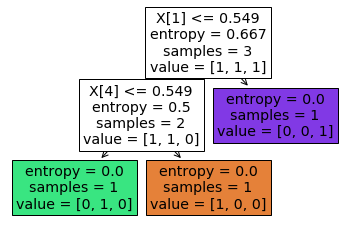

In [171]:
# Den Trainierten Klassifizierer können wir uns ansehen
import matplotlib.pyplot as plt
plot_tree(dtc, filled=True)
plt.show()

In [172]:
# Wie kann ich mit Themen in texten umgehen? ich kann diese einfach Nummern zuordnen
target_dictonary = {'Politik':1,'Apple':2,'Motor:':3,'Sport':4,'Finanzen':5}

In [173]:
# Und mir einen nummerischen Vektor bauen, der meine Zeitungsartikel zu einem 
# Trainingsdatensatz macht
target_vector = [4,4,1,1,1,5,4,5,3,3,2,5,2,3,1,3,4,4,4,1,5,5,2,2,2]

In [174]:
# Erstellen wir zunächst eine frische Instanz des Klassifizierers 
dtc = DecisionTreeClassifier()

In [175]:
#Trainieren diesen mit unseren Zeitungsartikeln und Zielgrößen
dtc = dtc.fit(tfidfDF.values.tolist(),target_vector)

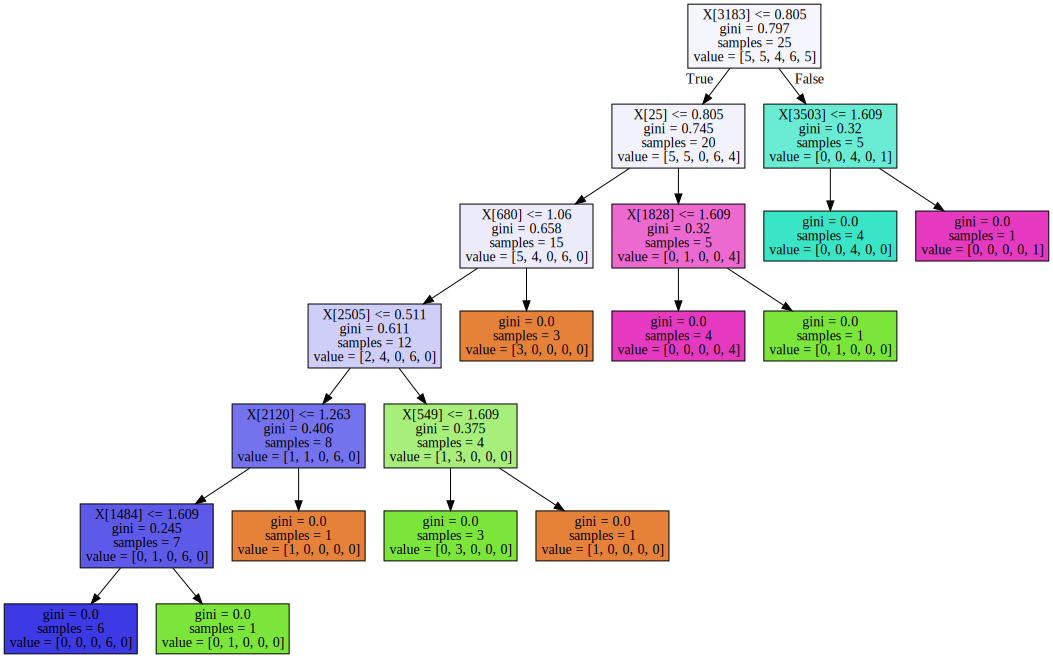

In [176]:
# Und lassen uns das Ergebnis anzeigen
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

graph = Source(tree.export_graphviz(dtc, filled = True))
display(SVG(graph.pipe(format='svg')))

!['fertig'](<https://static.az-cdn.ch/__ip/jhCNdvpaNcYlmtSn50i5Rd5R8x8/63ded7441a1dbadd4a156a0ae97d200ac77814bb/remote.adjust.rotate=0&remote.size.w=1920&remote.size.h=1080&local.crop.h=1080&local.crop.w=1920&local.crop.x=0&local.crop.y=0&r=1,n-medium-16x9>)